<h1 align = "Center"> IST 5520 Spring 2020: Group 1 Project Proposal </h1>
<h2 align = "Center"> An Analysis of Vermont Crashes Data</h2>
<h3 align = "Center"> By: Bryce Cordry, Kyle Johnson, Matthew Kovar, Yitian Luo, Brian Middleton </h3>

# Introduction

Traffic crashes happen every day in the world and they rank as the 9th leading cause of death. In the United States, there are an average of 16,438 car accidents per day. Moreover, nearly 1.25 million people die in car accidents per year, by this we mean that, car accidents cause 3,287 deaths per day. （https://www.thewanderingrv.com/car-accident-statistics/) Therefore, it is important for us to get more information about car crashes and try to avoid them.

We found a dataset of car crashes in the State of Vermont from the year 2014 to 2018. We are considering the dataset from the perspective of an insurance company using telematics devices in vehicles to create individualized risk profiles for policyholders located in Vermont and set their premiums accordingly. We are interested in determining what kinds of characteristics are responsible for vehicle accidents and how to use this information to adjust a policyholder's future premium once they are in an accident. To be more specific, we want to figure out what matters the most in the accidents. Also, we hope to find out factors that lead to various outcomes (property damage, injury or fatal). In addition, we want to find out areas or roads that are most prone to accidents.

# Data Source and Collection

The dataset was downloaded from the Vermont Open Geodata Portal (https://geodata.vermont.gov/datasets/VTrans::vt-crashes-2018?orderBy=ACCIDENTDATE&orderByAsc=false). 
We combined the data from year 2014 to year 2018 and it contains 61,562 car accidents in Vermont. The data was collected by various reporting agencies within Vermont. 

This dataset contains 36 columns listed below. Some of the key information includes the type of injury, the impairment of the driver, the accident location, date, weather, the road conditions, as well as the reporting agency. All of this information can be useful for us in determining how the insured's future premiums will be adjusted.
 

- 	OBJECTID 
-   REPORTINGAGENCYid 
- 	ReportingAgency 
- 	REPORTNUMBER 
- 	ACCIDENTDATE 
- 	STREETADDRESS 
- 	INTERSECTIONWITH 
- 	DirOfCollision 
- 	RoadGroup 
- 	AOTACTUALMILEPOINT 
- 	RoadCharacteristics 
- 	NonReportableAddress 
- 	CITYORTOWNid 
- 	CITYORTOWN 
- 	EASTING 
- 	NORTHING
- 	AOTROUTEid 
-	AOTROUTE 
-	LRSNUMBER 
-	HOWMAPPED 
-	Animal 
-	Impairment 
-	Involving 
-	Weather 
-	DayNight 
-	InjuryType 
-	LOC_ERROR 
-	RDFLNAME 
-	SurfaceCondition 
-	RoadCondition 
-	Route 
-	LATITUDE 
-	LONGITUDE 
-	AOTROADWAYGROUPid 


# Technical Approach

### Data Manipulation

Use Pandas/Numpy/Scipy for datasets manipulation. First we merge the datasets from the years 2015-2018. Some columns are dropped due to inconsistent recording from year to year. (Some columns don't exist on certain years). They we remove columns which hold data which is not relevant to our analysis, such as internal Vermonet Department of Transportation ID codes posted to cities for which we already have the names. Then we begin handling NA's by replacing them with a filler value such as "Unknown" where it is appropriate. Following that, we fill NA values based upon the general distribution of known values (where appropriate). Where possible we try to intelligently fill NA's by using clues in the data, such as on Road and Surface Conditions, we fill NA's by the prevalent weather first, and distribution second. Finally we remove rows with remaining NA's and save the cleansed data.   

In [1]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import and clean data, deal with missing values
years = [2015, 2016, 2017, 2018]
df_dict = {year:pd.read_csv("VT_Crashes__{}.csv".format(str(year))) for year in years}

for year, df in df_dict.items():
  df_dict[year] = df.rename(columns={"ACCIDENTDA":"ACCIDENTDATE", 
                                     "AOTACTUALM":"AOTACTUALMILEPOINT",
                                     "INTERSECTI":"INTERSECTIONWITH",
                                     "STREETADDR":"STREETADDRESS",
                                     "REPORTNUMB":"REPORTNUMBER",
                                     "ReportingAgency":"REPORTINGAGENCY",
                                     "DirOfCollision":"DIROFCOLLI",
                                     "VCSG_LRSNUMBER":"LRSNUMBER",
                                     "REPORTINGA":"REPORTINGAGENCYid",
                                     "VCSG_EASTING":"EASTING",
                                     "VCSG_NORTHING":"NORTHING",
                                     "VCSG_AOTROUTE":"AOTROUTE",
                                     "VCSG_CITYORTOWN":"CITYORTOWN"})
  df_dict[year]["Year"] = year

df_dict[2018] = df_dict[2018].rename(columns={"LATITUDE":"LAT_DD","LONGITUDE":"LONG_DD"})
df_dict[2017] = df_dict[2017].rename(columns={"GIS_LATITUDE":"LAT_DD","GIS_LONGITUDE":"LONG_DD"})

df = pd.concat(df_dict.values(), sort=True)

#Drop Columns
df = df.drop(columns=['ACCIDENTTI','AOTROADWAYGROUPid','AOTROUTEid','CITYORTOWNid','MILEMARKER1','MILEMARKER_1',
                      'MILEMARKER_2','NUMBER','NUMBER1','NUMBER2','NUMBER3','OBJECTID','RDFLNAME','REPORTINGAGENCYid',
                      'VCSG_AOTROUTEid','VCSG_CITYORTOWNid','NORTHING','EASTING','DIRFROMNEA','CrashType',
                     'DISTANCE_1','POSTEDSPEE','VCSG_LATITUDE','VCSG_LONGITUDE','Route', 'AOTROADWAY'])

#Relabel NA's
df['AOTACTUALMILEPOINT'] = df['AOTACTUALMILEPOINT'].fillna("Unmarked")
df['AOTROUTE'] = df['AOTROUTE'].fillna("Unknown")
df['Animal'] = df['Animal'].fillna("Unknown")
df['CITYORTOWN'] = df['CITYORTOWN'].fillna("Unknown")
df['DIROFCOLLI'] = df['DIROFCOLLI'].fillna("Unknown")
df['INTERSECTIONWITH'] = df['INTERSECTIONWITH'].fillna("Unknown")
df['Impairment'] = df['Impairment'].fillna("None")
df['Involving'] = df['Involving'].fillna("None")
df['LOCALID'] = df['LOCALID'].fillna("Unknown")
df['LOC_ERROR'] =df['LOC_ERROR'].fillna("NO ERROR")
df['LRSNUMBER'] = df['LRSNUMBER'].fillna("None")
df['NonReportableAddress'] = df['NonReportableAddress'].fillna("Reportable")
df['RoadCharacteristics'] = df['RoadCharacteristics'].fillna("Other - Explain in Narrative")
df['Weather'] = df['Weather'].fillna("Unknown")
df['STREETADDRESS'] = df['STREETADDRESS'].fillna("Unknown")

#Fill NA's based upon Distribution or other conditions
values_dist = df.DayNight.value_counts(normalize=True)
missing = df['DayNight'].isnull()
df.loc[missing,'DayNight'] = np.random.choice(values_dist.index, size=len(df[missing]),p=values_dist.values)

values_dist = df.InjuryType.value_counts(normalize=True)
missing = df['InjuryType'].isnull()
df.loc[missing,'InjuryType'] = np.random.choice(values_dist.index, size=len(df[missing]),p=values_dist.values)

Freezing_Precipitation_df = df[(df['SurfaceCondition'].isin(['Snow','Ice','Slush','Wet']))]
values_dist = Freezing_Precipitation_df.SurfaceCondition.value_counts(normalize=True)
df['SurfaceCondition'] = np.where(((df.SurfaceCondition.isnull())& (df['Weather'] == 'Rain')),'Wet',df.SurfaceCondition)
df['SurfaceCondition'] = np.where(((df.SurfaceCondition.isnull())& (df['Weather'] == 'Clear')),'Dry',df.SurfaceCondition)
df['SurfaceCondition'] = np.where(((df.SurfaceCondition.isnull())& (df['Weather'] == 'Freezing Precipitation')),np.random.choice(values_dist.index,p=values_dist.values),df.SurfaceCondition)
df['RoadCondition'] = np.where(((df.RoadCondition.isnull())& (df['Weather'] == 'Freezing Precipitation')),'Road Surface Condition(wet, icy, snow, slush, etc)',df.RoadCondition)
df['RoadCondition'] = np.where(((df.RoadCondition.isnull())& (df['Weather'] == 'Rain')),'Road Surface Condition(wet, icy, snow, slush, etc)',df.RoadCondition)

values_dist = df.SurfaceCondition.value_counts(normalize=True)
missing = df['SurfaceCondition'].isnull()
df.loc[missing,'SurfaceCondition'] = np.random.choice(values_dist.index, size=len(df[missing]),p=values_dist.values)

values_dist = df.RoadCondition.value_counts(normalize=True)
missing = df['RoadCondition'].isnull()
df.loc[missing,'RoadCondition'] = np.random.choice(values_dist.index, size=len(df[missing]),p=values_dist.values)

#remove remaining NA's
df = df.dropna()

df = df.astype(str)

df.reset_index(drop = True, inplace = True)

from datetime import datetime
from dateutil import parser
for i in range(len(df)):
    x = parser.isoparse(df['ACCIDENTDATE'][i])
    x = x.strftime('%Y-%m-%d %H:%M:%S')
    df['ACCIDENTDATE'][i] = x
    
df['ACCIDENTDATE'] = pd.to_datetime(df['ACCIDENTDATE'])    

df.to_csv("combined.csv")

### Data Analysis

Analyze the different accidents type under different conditions. Data visualization including hot map of the areas that car crashes happened in Vermont and the histogram of the accidents under different situations.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23735 entries, 0 to 23734
Data columns (total 29 columns):
ACCIDENTDATE            23735 non-null datetime64[ns]
AOTACTUALMILEPOINT      23735 non-null object
AOTROUTE                23735 non-null object
Animal                  23735 non-null object
CITYORTOWN              23735 non-null object
DIROFCOLLI              23735 non-null object
DayNight                23735 non-null object
HOWMAPPED               23735 non-null object
INTERSECTIONWITH        23735 non-null object
Impairment              23735 non-null object
InjuryType              23735 non-null object
Involving               23735 non-null object
LAT_DD                  23735 non-null object
LOCALID                 23735 non-null object
LOC_ERROR               23735 non-null object
LONG_DD                 23735 non-null object
LRSNUMBER               23735 non-null object
NonReportableAddress    23735 non-null object
REPORTINGAGENCY         23735 non-null object
REPORTNUM

In [3]:
# Get the descriptive summary
df.describe().transpose()

,count,unique,top,freq,first,last
ACCIDENTDATE,23735,23195,2017-03-10 00:00:00,4,2016-01-06 10:17:00,2018-12-31 17:44:00
AOTACTUALMILEPOINT,23735,1774,999.99,7922,NaT,NaT
AOTROUTE,23735,1631,Unknown,2640,NaT,NaT
Animal,23735,6,None/Other,19934,NaT,NaT
CITYORTOWN,23735,253,Burlington,3000,NaT,NaT
DIROFCOLLI,23735,23,Unknown,6069,NaT,NaT
DayNight,23735,2,Day,17908,NaT,NaT
HOWMAPPED,23735,4,LRS,15777,NaT,NaT
INTERSECTIONWITH,23735,10553,Unknown,4210,NaT,NaT
Impairment,23735,4,None,22710,NaT,NaT


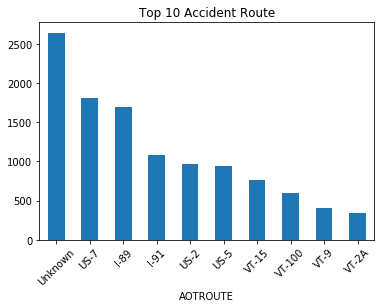

In [4]:
# Summarization statistics
AOTR=pd.crosstab(index=df['AOTROUTE'],columns="Count")
AOTR=AOTR.sort_values(by='Count',ascending=False).head(10)
AOTR.plot(kind='bar', legend = False)
plt.title('Top 10 Accident Route')
plt.xticks(rotation=45)
plt.show()

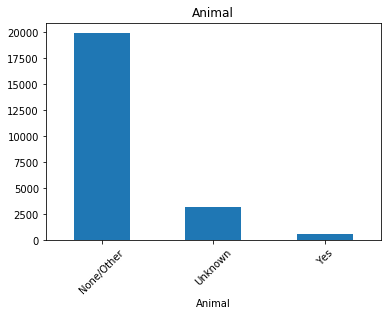

In [5]:
df['Animal'] = np.where((df['Animal'] == 'Deer'),'Yes',df.Animal)
df['Animal'] = np.where((df['Animal'] == 'Domestic'),'Yes',df.Animal)
df['Animal'] = np.where((df['Animal'] == 'Moose'),'Yes',df.Animal)
df['Animal'] = np.where((df['Animal'] == 'Wild'),'Yes',df.Animal)
Ani=pd.crosstab(index=df['Animal'],columns="Count")
Ani=Ani.sort_values(by='Count',ascending=False)
Ani.plot(kind='bar', legend = False)
plt.title('Animal')
plt.xticks(rotation=45)
plt.show()

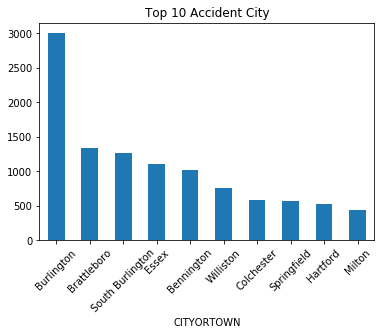

In [6]:
CITY=pd.crosstab(index=df['CITYORTOWN'],columns="Count")
CITY=CITY.sort_values(by='Count',ascending=False).head(10)
CITY.plot(kind='bar', legend = False)
plt.title('Top 10 Accident City')
plt.xticks(rotation=45)
plt.show()

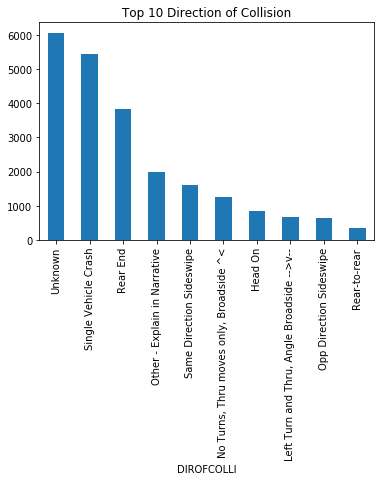

In [7]:
DIRE=pd.crosstab(index=df['DIROFCOLLI'],columns="Count")
DIRE=DIRE.sort_values(by='Count',ascending=False).head(10)
DIRE.plot(kind='bar', legend = False)
plt.title('Top 10 Direction of Collision')
plt.show()

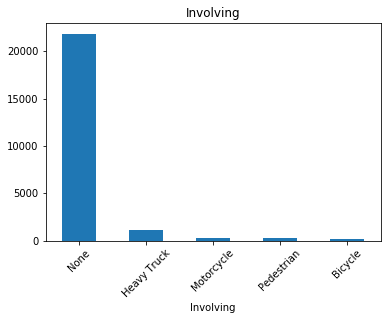

In [8]:
Inv=pd.crosstab(index=df['Involving'], columns="Count")
Inv=Inv.sort_values(by='Count',ascending=False)
Inv.plot(kind='bar', legend = False)
plt.title('Involving')
plt.xticks(rotation=45)
plt.show()

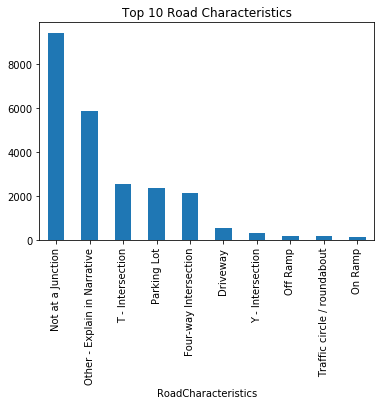

In [9]:
RoadChar=pd.crosstab(index=df['RoadCharacteristics'],columns="Count")
RoadChar=RoadChar.sort_values(by='Count', ascending=False).head(10)
RoadChar.plot(kind='bar', legend = False)
plt.title('Top 10 Road Characteristics')
plt.show()

From the above cross-tab graph, we conclude that most car crashes took place in the city called Burlington and the US-7 route. Based on our research, this makes sense because Burlington is the biggest city in Vermont State and US-7 route crosses the city of Burlington.

In [10]:
# Contigency tables
pd.crosstab(df['InjuryType'],df['Weather'], margins=True)

Weather,Clear,Cloudy,Freezing Precipitation,Rain,Unknown,Wind,All
InjuryType,,,,,,,
Fatal,75,24,10,8,19,0,136
Injury,2094,811,457,301,894,10,4567
Property Damage Only,7582,2889,1999,996,5526,40,19032
All,9751,3724,2466,1305,6439,50,23735


In [11]:
pd.crosstab(df['InjuryType'],df['DayNight'], margins=True)

DayNight,Day,Night,All
InjuryType,,,
Fatal,86,50,136
Injury,3291,1276,4567
Property Damage Only,14531,4501,19032
All,17908,5827,23735


In [12]:
pd.crosstab( df['SurfaceCondition'], df['Weather'], margins=True)

Weather,Clear,Cloudy,Freezing Precipitation,Rain,Unknown,Wind,All
SurfaceCondition,,,,,,,
Dry,8579,2267,19,18,4199,9,15091
Ice,246,183,433,27,411,4,1304
Not Reported,9,2,0,0,24,0,35
Other - Explain in Narrative,28,14,10,2,30,1,85
"Sand, mud, dirt, oil, gravel",56,32,2,14,28,0,132
Slush,65,71,164,11,62,0,373
Snow,265,292,1663,8,549,30,2807
Unknown,49,26,8,4,261,0,348
Water (standing / moving),1,0,3,45,15,0,64


In [13]:
pd.crosstab(df['DIROFCOLLI'],df['Weather'], margins=True)

Weather,Clear,Cloudy,Freezing Precipitation,Rain,Unknown,Wind,All
DIROFCOLLI,,,,,,,
Head On,410,146,183,55,32,5,831
"Left Turn and Thru, Angle Broadside -->v--",432,137,41,48,21,0,679
"Left Turn and Thru, Broadside v<--",205,67,27,25,10,1,335
"Left Turn and Thru, Head On ^v--",70,25,6,6,3,0,110
"Left Turn and Thru, Same Direction Sideswipe/Angle Crash vv--",83,35,9,6,3,0,136
"Left Turns, Opposite Directions, Head On/Angle Crash --^v--",18,6,0,4,0,0,28
"Left Turns, Same Direciton, Rear End v--v--",9,2,1,2,0,0,14
"Left Turns, Same Direction, Rear End v--v--",11,4,2,1,0,0,18
"Left and Right Turns, Simultaneous Turn Crash --vv--",24,7,4,3,1,0,39


We created the contigency table to see how factors related generally. We concluded that most acciednts were happened during daytime when the weather is fine, and the major damage type is property damage.

## Correlation Analysis

In this section, we take a look at two methods to calculate correlations. Below are the packages used for these excercises.

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as ss
import itertools
from matplotlib import pyplot as plt

### Simple Correlation
First, we need to reload our dataset for calculating the correlation between variables.

In [15]:
corr_df = pd.read_csv('combined.csv')
corr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23735 entries, 0 to 23734
Data columns (total 30 columns):
Unnamed: 0              23735 non-null int64
ACCIDENTDATE            23735 non-null object
AOTACTUALMILEPOINT      23735 non-null float64
AOTROUTE                23735 non-null object
Animal                  23735 non-null object
CITYORTOWN              23735 non-null object
DIROFCOLLI              23735 non-null object
DayNight                23735 non-null object
HOWMAPPED               23735 non-null object
INTERSECTIONWITH        23735 non-null object
Impairment              23735 non-null object
InjuryType              23735 non-null object
Involving               23735 non-null object
LAT_DD                  23735 non-null float64
LOCALID                 23735 non-null object
LOC_ERROR               23735 non-null object
LONG_DD                 23735 non-null float64
LRSNUMBER               23735 non-null object
NonReportableAddress    23735 non-null object
REPORTINGAGENCY

Next, we will calculate the correlation using the .corr() method

Text(0.5, 1, 'Basic Correlation')

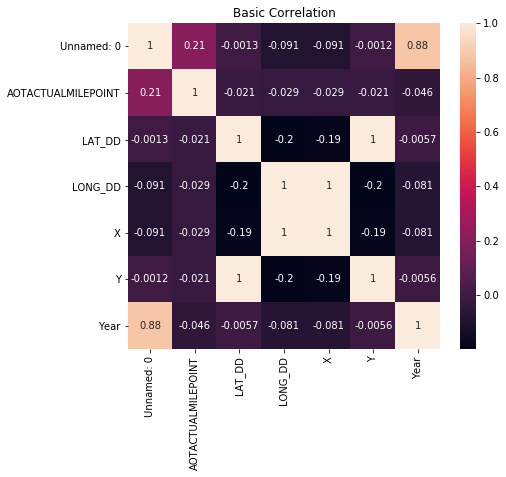

In [16]:
correlation = corr_df.corr()

fig, ax = plt.subplots(figsize=(7, 6))
ax = sns.heatmap(correlation, annot=True, ax=ax) 
ax.set_title("Basic Correlation")

As you can see, the function worked, however only on the numeric data we have in our dataset. This data used in the correlation analysis used variables such as year, latitude, and longitude. 
As they're only useful to us as identifiers, this analysis isn't useful. Although, it does help us confirm that X is the same as Latitude, and Y is the same as Longitude

### Cramer's V Correlation
In researching potential correlation calculations for our dataset, which mainly is composed of categorical data, we discovered an algorithm that computes correlation on categorical variables.
Note that the following code is taken from a research paper and cited within the following function.

The first step is to chose which columns from the dataset we would like to calculate. We chose every column that was of type "object", and then further reduced the columns to eliminate redundancy.

In [17]:
# We need to choose columns to correlate
chosen_cols = ['Animal','CITYORTOWN','DIROFCOLLI','DayNight',
                 'Impairment', 'InjuryType','Involving','LOCALID','RoadCharacteristics','SurfaceCondition',
                 'Weather','INTERSECTIONWITH']

Next, we define the function used for the calculation of the correlations.

In [18]:
def cramers_corrected_stat(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

The third step is to run the calculations and save them into a correlation matrix. The try/except statements are there to handle a specific error that occurs within our data. The crosstabulation for a few combinations of variables is much too large to compute, so we utilize an except statement to replace those values with 0. There might be a small correlation, but without further reduction of one of the variables we cannot tell. We chose not to reduce the troubling variable, INTERSECTIONWITH, to ensure that the quality of data remains as high as possible.

In [19]:
# Code taken from https://www.kaggle.com/phaethonprime/eda-and-logistic-regression
# Adjusted to fit our dataset
corr_matrix = np.zeros((len(chosen_cols),len(chosen_cols)))

for col1, col2 in itertools.combinations(chosen_cols, 2):
    try:
        idx1, idx2 = chosen_cols.index(col1), chosen_cols.index(col2)
        corr_matrix[idx1, idx2] = cramers_corrected_stat(pd.crosstab(corr_df[col1], corr_df[col2]))
        corr_matrix[idx2, idx1] = corr_matrix[idx1, idx2]
    except:
        # If an error is thrown, replace the correlation value with 0.00
        idx1, idx2 = chosen_cols.index(col1), chosen_cols.index(col2)
        corr_matrix[idx1, idx2] = 0.00
        corr_matrix[idx2, idx1] = corr_matrix[idx1, idx2]

The final step is to plot the correlation using a heatmap.

Text(0.5, 1, 'Cramer V Correlation')

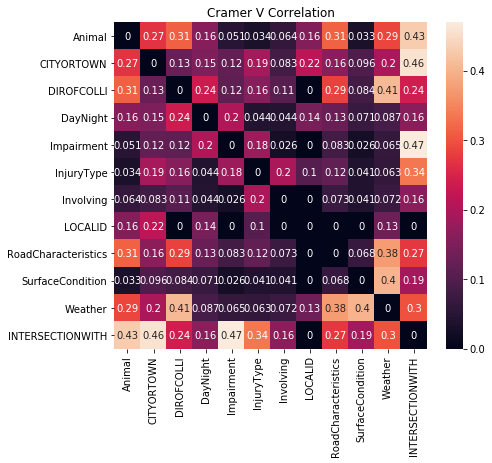

In [20]:
corr = pd.DataFrame(corr_matrix, index=chosen_cols, columns=chosen_cols)
fig, ax = plt.subplots(figsize=(7, 6))
ax = sns.heatmap(corr, annot=True, ax=ax)
ax.set_title("Cramer V Correlation")

As the above plot shows us, there are not many strong correlations. Some of the stronger correlations makes sense - INTERSECTIONWITH names roads that exist within CITYORTOWN - but some of them are still interesting.

At a high level, INTERSECTIONWITH and Animal only have a correlation of .43, but this suggests that there are particular intersections that have more animal related car crashes.
Similarily, INTERSECTIONWITH and Impairment also have a slightly stronger correlation, which suggests that there are hotspots of alchol use.
The story gets more interesting when we look at DIROFCOLLI and Weather. Why would weather determine the direction of collision? Let's explore this relationship.

In [21]:
# Crosstab of DIROFCOLLI and Weather
pd.crosstab(corr_df['DIROFCOLLI'],corr_df['Weather'])

Weather,Clear,Cloudy,Freezing Precipitation,Rain,Unknown,Wind
DIROFCOLLI,,,,,,
Head On,410,146,183,55,32,5
"Left Turn and Thru, Angle Broadside -->v--",432,137,41,48,21,0
"Left Turn and Thru, Broadside v<--",205,67,27,25,10,1
"Left Turn and Thru, Head On ^v--",70,25,6,6,3,0
"Left Turn and Thru, Same Direction Sideswipe/Angle Crash vv--",83,35,9,6,3,0
"Left Turns, Opposite Directions, Head On/Angle Crash --^v--",18,6,0,4,0,0
"Left Turns, Same Direciton, Rear End v--v--",9,2,1,2,0,0
"Left Turns, Same Direction, Rear End v--v--",11,4,2,1,0,0
"Left and Right Turns, Simultaneous Turn Crash --vv--",24,7,4,3,1,0


We need to clean the DIROFCOLLI column a little more. We will remove unknowns and group the values together, generate a new confusion matrix, then recalculate Cramer's V.

In [22]:
# Removing Unknowns from data
df2 = corr_df
df2 = df2[df2.DIROFCOLLI != 'Unknown']
df2 = df2[df2.Weather != 'Unknown']

# Grouping values in DIROFCOLLI
# Create groups of values
b_list = ['Left Turn and Thru, Angle Broadside -->v--','Left Turn and Thru, Broadside v<--', 
          'No Turns, Thru moves only, Broadside ^<', 'Right Turn and Thru, Angle Broadside -->^--', 
          'Right Turn and Thru, Broadside ^<--']
h_list = ['Left Turn and Thru, Head On ^v--', 'Left Turns, Opposite Directions, Head On/Angle Crash --^v--', 'Right Turn and Thru, Head On v^--']
s_list = ['Left Turn and Thru, Same Direction Sideswipe/Angle Crash vv--','Left and Right Turns, Simultaneous Turn Crash --vv--', 
          'Opp Direction Sideswipe','Right Turn and Thru, Same Direction Sideswipe/Angle Crash ^^--','Same Direction Sideswipe']
r_list = ['Left Turns, Same Direction, Rear End v--v--','Left Turns, Same Direciton, Rear End v--v--','Rear-to-rear','Right Turn, Same Direciton, Rear End ^--^--',
          'Right Turn, Same Direction, Rear End ^--^--']
            
# Loop through column and replace values
for i in b_list:
    df2['DIROFCOLLI'] = df2['DIROFCOLLI'].replace(i, 'Broadside')
for i in h_list:
    df2['DIROFCOLLI'] = df2['DIROFCOLLI'].replace(i, 'Head On')
for i in s_list:
    df2['DIROFCOLLI'] = df2['DIROFCOLLI'].replace(i, 'Sideswipe')
for i in r_list:
    df2['DIROFCOLLI'] = df2['DIROFCOLLI'].replace(i, 'Rear End')

In [23]:
#  New Crosstab of DIROFCOLLI and Weather
new_crosstab = pd.crosstab(df2['DIROFCOLLI'],df2['Weather'])
new_crosstab

Weather,Clear,Cloudy,Freezing Precipitation,Rain,Wind
DIROFCOLLI,,,,,
Broadside,1476,499,232,178,5
Head On,508,179,194,66,5
Other - Explain in Narrative,1082,397,211,124,4
Rear End,2570,916,365,278,7
Sideswipe,1440,520,298,166,4
Single Vehicle Crash,2507,1144,1127,473,24


In [24]:
cramers_corrected_stat(new_crosstab)

0.08426088203317546

As you can see, the correlation of 41% was misleading. The actual value is closer to **8%**. The unknowns available in the original data were skewing the calculation, so there really isn't a correlation there. Since we can see how misleading this correlation is, lets look at the relationship between INTERSECTIONWITH and the other variables with greater than 40% correlation.

In [25]:
pd.crosstab(corr_df['INTERSECTIONWITH'],corr_df['Animal'])

Animal,Deer,Domestic,Moose,None/Other,Unknown,Wild
INTERSECTIONWITH,,,,,,
Leicester Whiting Rd,0,0,0,1,0,0
"""Truly Unique""",0,0,0,1,0,0
"""Twin Bridges"", Bridge Over Rt 4a Whipple Hollow Rd",0,0,0,1,0,0
# 1047 US Rte. 302,0,0,0,1,0,0
# 135,0,0,0,1,0,0
...,...,...,...,...,...,...
church St,0,0,0,3,0,0
la Perle Dr,0,0,1,0,0,0
s Winooski Ave,0,0,0,1,0,0


The crosstab shows a lot of values for INTERSECTIONWTIH, but we want to keep as many values as possible so we are going to reduce the animal column and then recalculate 

In [26]:
# Grouping values in DIROFCOLLI
# Create groups of values
a_list = ['Animal','Deer','Domestic','Moose','Unknown','Wild']
            
# Loop through column and replace values
for i in a_list:
    df2['Animal'] = df2['Animal'].replace(i, 'Animal Hit')

df2['Animal'] = df2['Animal'].replace('None/Other','No Animal Hit')


intersection_animal = pd.crosstab(df2['INTERSECTIONWITH'],df2['Animal'])


cramers_corrected_stat(intersection_animal)

0.290114800515371

The correlation lowered a bit but still suggests that there is a small correlation between these variables. We will repeat the process one more time to check INTERSECTIONWITH and Impairment

In [27]:
# Grouping values in DIROFCOLLI
# Create groups of values
i_list = ['Alcohol','Alcohol and Drugs','Drugs']
            
# Loop through column and replace values
for i in i_list:
    df2['Impairment'] = df2['Impairment'].replace(i, 'Impaired')

df2['Impairment'] = df2['Impairment'].replace('None','Not Impaired')

intersection_impairment= pd.crosstab(df2['INTERSECTIONWITH'],df2['Impairment'])


cramers_corrected_stat(intersection_impairment)

0.28900974993127704

This had the same effect as the previous correlation. Let's revisualize the correlation chart again.

Text(0.5, 1, 'Final Cramer V Correlation')

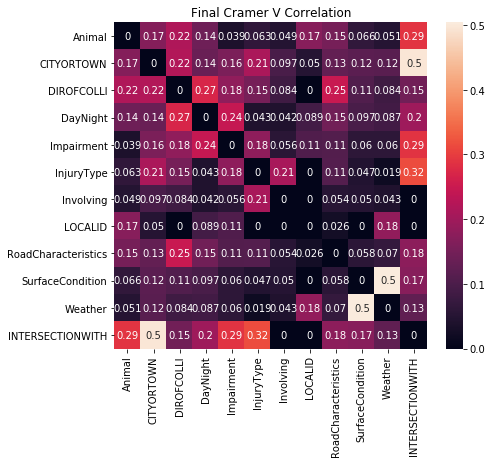

In [28]:
corr_matrix = np.zeros((len(chosen_cols),len(chosen_cols)))

for col1, col2 in itertools.combinations(chosen_cols, 2):
    try:
        idx1, idx2 = chosen_cols.index(col1), chosen_cols.index(col2)
        corr_matrix[idx1, idx2] = cramers_corrected_stat(pd.crosstab(df2[col1], df2[col2]))
        corr_matrix[idx2, idx1] = corr_matrix[idx1, idx2]
    except:
        # If an error is thrown, replace the correlation value with 0.00
        idx1, idx2 = chosen_cols.index(col1), chosen_cols.index(col2)
        corr_matrix[idx1, idx2] = 0.00
        corr_matrix[idx2, idx1] = corr_matrix[idx1, idx2]

        
corr = pd.DataFrame(corr_matrix, index=chosen_cols, columns=chosen_cols)
fig, ax = plt.subplots(figsize=(7, 6))
ax = sns.heatmap(corr, annot=True, ax=ax)
ax.set_title("Final Cramer V Correlation")

Interestingly, after cleaning the data some more, we see a stronger correlation between weather and surface condition. This is a relationship we assumed would be visible, as the weather determines if a road is icy or wet for the most part.

In [29]:
# import packages
import numpy as np
import pandas as pd

import re
import seaborn as sns
from datetime import datetime
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
%matplotlib inline

In [30]:
# read in data
df = pd.read_csv('./combined.csv')

In [31]:
#get info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23735 entries, 0 to 23734
Data columns (total 30 columns):
Unnamed: 0              23735 non-null int64
ACCIDENTDATE            23735 non-null object
AOTACTUALMILEPOINT      23735 non-null float64
AOTROUTE                23735 non-null object
Animal                  23735 non-null object
CITYORTOWN              23735 non-null object
DIROFCOLLI              23735 non-null object
DayNight                23735 non-null object
HOWMAPPED               23735 non-null object
INTERSECTIONWITH        23735 non-null object
Impairment              23735 non-null object
InjuryType              23735 non-null object
Involving               23735 non-null object
LAT_DD                  23735 non-null float64
LOCALID                 23735 non-null object
LOC_ERROR               23735 non-null object
LONG_DD                 23735 non-null float64
LRSNUMBER               23735 non-null object
NonReportableAddress    23735 non-null object
REPORTINGAGENCY

## Dimension Reduction

### Pre-processing

Due to the immense size of the dataset, we must first reduce dimensions manaully based upon intuition derived from background knoweledge of transportation systems.

The AOTRoute column indicates the route number or road name on which the accident occurred. We will do a frequency analysis to determine the routes with highest crash volumes, to see if there are any surprises.

In [32]:
# frequency analyis for AOTRoute
df['AOTROUTE'].value_counts().head(20)

Unknown           2640
US-7              1811
I-89              1690
I-91              1086
US-2               963
US-5               937
VT-15              768
VT-100             604
VT-9               401
VT-2A              341
US-4               338
VT-30              254
VT-11              241
VT-14              227
VT-116             208
US-302             190
VT-105             180
VT-12              174
VT-7A              168
ALTERNATE US-7     160
Name: AOTROUTE, dtype: int64

We will keep the ten routes with highest crash volume, and create dummy variables for each. 

In [33]:
# scale down
AOTRoute = pd.Series(np.where(((df['AOTROUTE'] != 'US-7')&(df['AOTROUTE'] != 'I-89')&
                            (df['AOTROUTE'] != 'I-91')&(df['AOTROUTE'] != 'US-2')&
                            (df['AOTROUTE'] != 'US-5')&(df['AOTROUTE'] != 'VT-15')&
                            (df['AOTROUTE'] != 'VT-100')&(df['AOTROUTE'] != 'VT-9')&
                            (df['AOTROUTE'] != 'VT-2A')&(df['AOTROUTE'] != 'US-4')),'Other',df.AOTROUTE))
AOTRoute = pd.get_dummies(AOTRoute)

The Animal column indicates whether an animal is involved, and if so, what kind (for example, deer, domestic, moose, etc). For purposes of dimension reduction, we will reduce this down to only indicate if an animal is involved or not.

In [34]:
# get dummies for animal --> get "none" column for yes/no
animal = pd.get_dummies(df['Animal'])['None/Other']
#recode 0 to 1 and 1 to 0; this way a 1 is yes
animal = pd.Series(np.where(np.array(animal)==0,1,0))

The CityOrTown Column indicates the jurisdiction in which the accident took place. Like the AOTRoute column, we will do a frequency analysis to see the cities with the highest crash volume.

In [35]:
# frequency analyis for CITYORTOWN
df['CITYORTOWN'].value_counts().head(20)

Burlington          3000
Brattleboro         1332
South Burlington    1264
Essex               1099
Bennington          1011
Williston            757
Colchester           577
Springfield          575
Hartford             520
Milton               439
Middlebury           398
Winooski City        351
Stowe                345
Rutland City         279
Montpelier           272
Barre City           242
Berlin               223
Richmond             218
Morristown           216
Shelburne            211
Name: CITYORTOWN, dtype: int64

We will keep the ten jurisdictions with highest crash volume, and create dummy variables for each.

In [36]:
# scale down
city_town = pd.Series(np.where(((df['CITYORTOWN'] != 'Burlington')&(df['CITYORTOWN'] != 'Brattleboro')&
                            (df['CITYORTOWN'] != 'South Burlington')&(df['CITYORTOWN'] != 'Essex')&
                            (df['CITYORTOWN'] != 'Bennington')&(df['CITYORTOWN'] != 'Williston')&
                            (df['CITYORTOWN'] != 'Colchester')&(df['CITYORTOWN'] != 'Springfield')&
                            (df['CITYORTOWN'] != 'Hartford')&(df['CITYORTOWN'] != 'Milton')),'Other',df.CITYORTOWN))
city_town = pd.get_dummies(city_town)

For the Day/Night and Impairment columns, we will select a "non-null" case to create a "yes/no" situation. Once we create the dummies, a 1 will be the "yes" case and a 0 will be the "no" case.

In [37]:
# DayNight --> save "night" case only as yes/no
night=pd.get_dummies(df['DayNight'])['Night']

In [38]:
# Impairment --> get "none" column for yes/no
impairment=pd.get_dummies(df['Impairment'])['None']
#recode 0 to 1 and 1 to 0; this way a 1 is yes
impairment = pd.Series(np.where(np.array(impairment)==0,1,0))

For the Injury, Involving, Road Condition, Surface Condition, and Weather columns, we will create dummy variables for each situation, then drop the "null" case.

In [39]:
# get dummies for Injury
injury = pd.get_dummies(df['InjuryType'])
# remove "property damage only" which is the null case
injury = injury.drop(columns=['Property Damage Only'])

In [40]:
# get dummies for Involving
involving = pd.get_dummies(df['Involving'])
# remove "none" column which is the null case
involving = involving.drop(columns = ['None'])

In [41]:
# Get dummies for road condition
roadcondition = pd.get_dummies(df['RoadCondition'])
# drop "none" column which is the null case, unreported situations, and the surface condition; will add in later
roadcondition = roadcondition.drop(columns=['None', 'Other - Explain in Narrative', 'Not reported', 'Unknown',
                                            'Road Surface Condition(wet, icy, snow, slush, etc)'])

In [42]:
# get dummies for surface condition
surfacecondition = pd.get_dummies(df['SurfaceCondition'])
# drop "dry" column which is the null case along with unreported situations
surfacecondition = surfacecondition.drop(columns=['Dry', 'Not Reported', 'Other - Explain in Narrative', 'Unknown'])

In [43]:
# get dummies for weather
weather = pd.get_dummies(df['Weather'])
# drop "clear" column which is the null case along with unreported situations
weather = weather.drop(columns=['Clear', 'Unknown'])

We also would like to look at the seasons. To do this we need to extract the month from the dates. After extracting the month, we use conditional logic to generalize the month to a season.

In [44]:
# get accident dates
datetime = df['ACCIDENTDATE']
months = '' # new string
# use loop to extract month from date string
for i in range(len(datetime)):
    match = re.search(r'\d{4}-\d{2}-\d{2}', datetime[i]).group()
    months += match[5:7] + ','
# remove last extraneous comma from loop
months = months[:-1]
# split comma separated string
months = months.split(",")
# convert to DataFrame
months = pd.Series(months)

In [45]:
# determine season
seasons = ""
for i in range(len(months)):
    if months[i]=='12':
        seasons += 'Winter' + ','
    if months[i]=='01':
        seasons += 'Winter' + ','
    if months[i]=='02':
        seasons += 'Winter' + ','
    if months[i]=='03':
        seasons += 'Spring' + ','
    if months[i]=='04':
        seasons += 'Spring' + ','
    if months[i]=='05':
        seasons += 'Spring' + ','
    if months[i]=='06':
        seasons += 'Summer' + ','
    if months[i]=='07':
        seasons += 'Summer' + ','
    if months[i]=='08':
        seasons += 'Summer' + ','
    if months[i]=='09':
        seasons += 'Fall' + ','
    if months[i]=='10':
        seasons += 'Fall' + ','
    if months[i]=='11':
        seasons += 'Fall' + ','
# remove last extraneous comma from loop
seasons = seasons[:-1]
# split comma separated string
seasons = seasons.split(",")
# convert to DataFrame
seasons = pd.Series(seasons)
seasons = pd.get_dummies(seasons)

During our data manipulation phase, we assembled our dummy variables into series or dataframes. Here we will combine these together to pass to the PCA method.

In [46]:
# Build data frame for PCA
pca_df = pd.concat([animal, night, impairment], axis=1)
pca_df.columns=['Animal', 'Night', 'Impairment']
pca_df = pd.concat([pca_df, AOTRoute, city_town, injury, involving, roadcondition, surfacecondition, weather, seasons],
                   axis=1, sort=False)
pca_df

,Animal,Night,Impairment,I-89,I-91,Other,US-2,US-4,US-5,US-7,...,Water (standing / moving),Wet,Cloudy,Freezing Precipitation,Rain,Wind,Fall,Spring,Summer,Winter
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23730,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
23731,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
23732,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
23733,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [47]:
# look at dataframe
pca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23735 entries, 0 to 23734
Data columns (total 53 columns):
Animal                                                      23735 non-null int64
Night                                                       23735 non-null uint8
Impairment                                                  23735 non-null int64
I-89                                                        23735 non-null uint8
I-91                                                        23735 non-null uint8
Other                                                       23735 non-null uint8
US-2                                                        23735 non-null uint8
US-4                                                        23735 non-null uint8
US-5                                                        23735 non-null uint8
US-7                                                        23735 non-null uint8
VT-100                                                      23735 non-null uint8


### Principal Component Analysis

Here we will do the Principal Component Analysis. To start we will run the PCA with all 53 dummy variable predictors.

In [48]:
# do PCA with full 53 components
pca_full = PCA(n_components=53)
# fit model
pca_full.fit(pca_df)

PCA(copy=True, iterated_power='auto', n_components=53, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [49]:
# check to see how much variance each explains
var_full = pca_full.explained_variance_ratio_
print(var_full)

[1.14135930e-01 9.16519508e-02 8.40406016e-02 7.04258463e-02
 6.89066582e-02 5.85950317e-02 5.10287389e-02 4.94155785e-02
 4.28090208e-02 4.10414512e-02 3.14458252e-02 2.89070647e-02
 2.11112867e-02 2.02162693e-02 1.78962287e-02 1.78416927e-02
 1.73502358e-02 1.44970904e-02 1.38627644e-02 1.23469956e-02
 1.15079063e-02 1.12474941e-02 1.09484163e-02 9.99607196e-03
 8.75029410e-03 8.51520065e-03 8.09954777e-03 7.91237951e-03
 7.29904104e-03 6.91488617e-03 5.90813857e-03 5.22688404e-03
 4.17764360e-03 4.13831907e-03 3.79456026e-03 3.38706857e-03
 3.31975573e-03 1.78559720e-03 1.72965983e-03 1.69668877e-03
 1.23130656e-03 1.21378802e-03 8.48096279e-04 8.00807072e-04
 6.44987413e-04 5.77433128e-04 3.80218786e-04 2.10713274e-04
 1.05482263e-04 1.05351845e-04 5.12941673e-32 3.24962375e-32
 2.21342198e-32]


In [50]:
# see cumulative variance
var_full_cumul = np.cumsum(np.round(pca_full.explained_variance_ratio_, decimals=4)*100)

print(var_full_cumul)

[11.41 20.58 28.98 36.02 42.91 48.77 53.87 58.81 63.09 67.19 70.33 73.22
 75.33 77.35 79.14 80.92 82.66 84.11 85.5  86.73 87.88 89.   90.09 91.09
 91.97 92.82 93.63 94.42 95.15 95.84 96.43 96.95 97.37 97.78 98.16 98.5
 98.83 99.01 99.18 99.35 99.47 99.59 99.67 99.75 99.81 99.87 99.91 99.93
 99.94 99.95 99.95 99.95 99.95]


Text(0, 0.5, 'Cumulative Variance Explained')

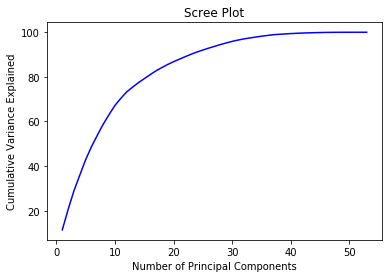

In [51]:
var1 = pd.DataFrame(var_full_cumul, index=np.arange(1,54))
plt.plot(var1,color='blue')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')

According to the scree plot, we would still have 90% representativeness if we pare down the number of predictors to 25.

In [52]:
# choose 25 component solution
# Select the number of components
pca25 = PCA(n_components=25)
pca25.fit(pca_df)
data_pca25 = pca25.transform(pca_df)

# Convert the numpy array to pandas DataFrame
data_pca25 = pd.DataFrame(data_pca25)
data_pca25.columns = ["PC"+str(i) for i in range(1,26)]

# Show the head of the DataFrame
data_pca25.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25
0,0.209557,0.529038,1.062132,0.004041,-0.028674,-0.243699,-0.023724,0.035665,-0.056838,-0.073598,...,-0.157791,0.149442,-0.144207,-0.285126,0.277174,-0.116203,-0.075022,-0.021974,0.096271,-0.193510
1,1.100206,0.149295,0.483637,-0.072635,0.096916,-0.300286,-0.436124,-0.048004,-0.130487,0.158471,...,-0.712884,-0.082438,-0.230155,0.024747,0.106229,-0.143067,-0.044141,-0.036419,-0.109765,0.060829
2,0.497063,1.235062,-0.083431,0.139500,0.107838,0.719475,-0.499181,0.552600,-0.433390,0.231567,...,-0.084276,0.361444,-0.138642,-0.270741,0.160972,-0.177356,-0.140381,-0.072859,0.122511,-0.222964
3,0.006967,0.987749,0.088046,-0.043142,-0.147139,-0.159093,0.079498,-0.142195,0.164181,-0.081019,...,0.006336,0.252181,-0.072400,-0.151110,0.230630,-0.221781,-0.161166,-0.201115,0.137579,-0.116576
4,0.342095,1.302427,-0.016975,-0.073836,0.126038,-0.135248,-0.675078,0.293656,-0.182686,0.324489,...,0.451307,-0.055560,-0.114769,-0.303121,0.036085,-0.057161,0.086735,-0.005612,-0.016825,0.169135
5,0.740288,0.594523,-0.468943,-0.165640,-0.051573,-0.343698,-0.353608,-0.056651,-0.158008,0.126498,...,0.237194,-0.233001,-0.031413,0.044529,0.062399,0.112033,-0.121329,0.319398,-0.043232,-0.083712
6,1.054161,0.139149,0.486114,-0.094817,0.063468,-0.322475,-0.443429,-0.063435,-0.134347,0.112190,...,0.082527,-0.731539,-0.065044,0.125661,0.218052,0.000918,-0.296134,0.293221,-0.160547,-0.066478
7,0.342095,1.302427,-0.016975,-0.073836,0.126038,-0.135248,-0.675078,0.293656,-0.182686,0.324489,...,0.451307,-0.055560,-0.114769,-0.303121,0.036085,-0.057161,0.086735,-0.005612,-0.016825,0.169135
8,0.977226,0.520032,-0.590689,-0.229846,0.084109,-0.382367,-0.617719,0.849089,0.329996,0.420787,...,-0.010975,0.039564,-0.069122,-0.030846,-0.032062,0.014248,-0.009273,-0.062066,-0.006145,0.039537
9,0.223759,-1.056654,0.169665,0.813792,-0.145524,0.314568,-0.196901,0.835206,0.119008,-0.067877,...,-0.126070,-0.139377,-0.050140,-0.159110,0.004491,0.163279,-0.128961,-0.077670,-0.024782,0.036972


In [53]:
#correlation analysis
pca25_corr = data_pca25.corr()

Text(0.5, 1, 'Basic Correlation')

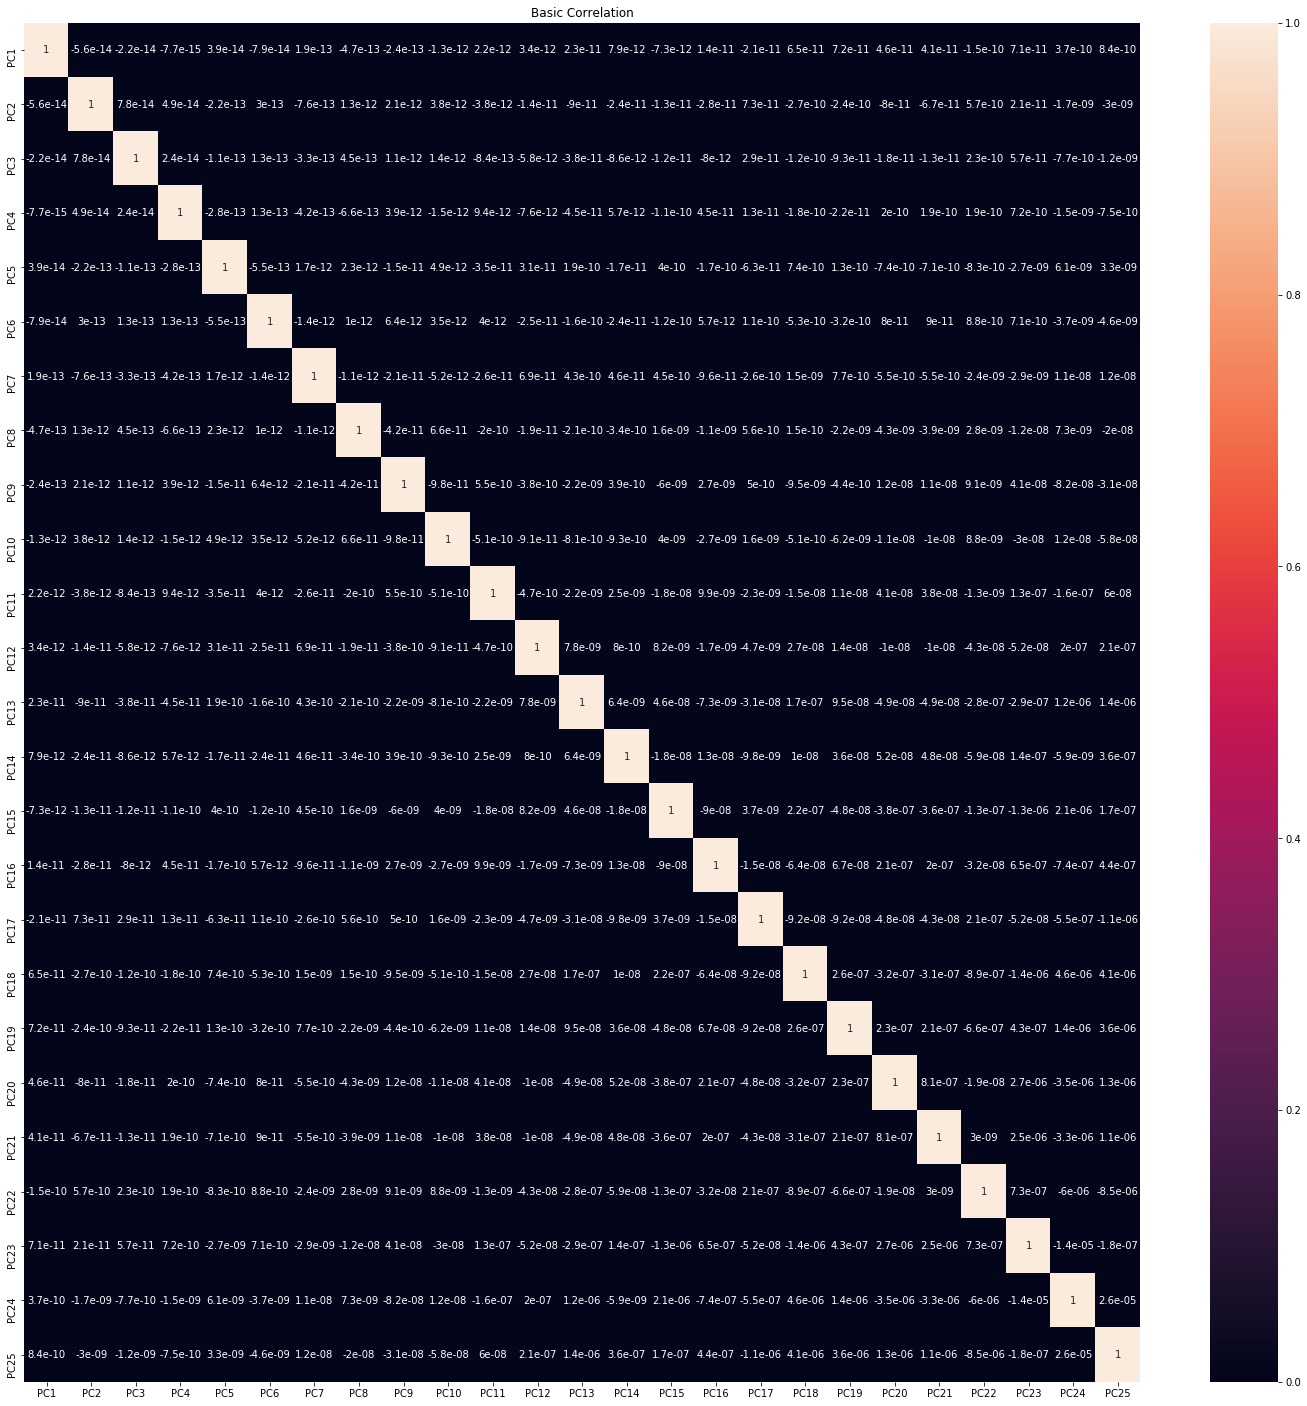

In [54]:
# visualize correlation
fig, ax = plt.subplots(figsize=(25, 25))
ax = sns.heatmap(pca25_corr, annot=True, ax=ax) 
ax.set_title("Basic Correlation")

According to the visualization, there is very little multicollinearity issue in the 25-predictor PCA. This means that there is at least some semblance of a pattern to predict what causes accidents (despite having no non-examples in the dataset). 

## Machine Learning

Conduct the regression and time series analysis to provide the future prediction for the premiums. This step will be performed during Milestone 3.

# Business Questions

After understanding where the data comes from and what it includes, we are able to simplify our business questions down to the following: 

1. Which factors cause accidents?
2. Which factors best determine the outcome of an accident
3. Which roads are most prone to accidents, and how can we improve them?